<h1 align="center">AIND-CNC Spring Hackathon</h1>  
<h4 align="center"> May 14, 2025 </h4>   
<h4 align="center"> Credit Assignment During Learning</h4> 
    

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
**Overview:** This notebook shows how to access and analyze data from the [Credit Assignment During Learning](https://www.allenneuraldynamics.org/projects/credit-assignment-during-learning) project established at the Allen Institute for Neural Dynamics. 

**Dataset:** Calcium activity was recorded from hundreds of cortical neurons in the mouse brain while the animal learned and performed a Brain Computer Interface (BCI) task over several days. 
    
**Goal:** This tutorial will show you how to:  
    1. load and work with neuronal calcium activity data processed via suite2p 
    2. plot event-aligned neural activity traces 



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Import packages and load data

In [1]:
# general imports 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
import os 
import pandas as pd
from skimage import measure

# pynwb imports to open nwb files
from hdmf_zarr import NWBZarrIO
from nwbwidgets import nwb2widget

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Metadata

In [2]:
metadata = pd.read_csv('/data/metadata.csv') 

metadata.sort_values(by = ['name'])

,Unnamed: 0,name,subject_id,session_type,genotype,virus,session_number
5,5,single-plane-ophys_731015_2025-01-10_18-06-31,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,18.0
32,32,single-plane-ophys_731015_2025-01-13_20-09-20,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,19.0
17,17,single-plane-ophys_731015_2025-01-24_20-00-44,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,20.0
12,12,single-plane-ophys_731015_2025-01-28_17-40-57,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,22.0
2,2,single-plane-ophys_731015_2025-01-28_18-56-35,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,22.0
45,45,single-plane-ophys_731015_2025-01-31_20-37-19,731015,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,23.0
43,43,single-plane-ophys_740369_2025-01-09_17-18-37,740369,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,22.0
6,6,single-plane-ophys_740369_2025-01-10_20-21-40,740369,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,23.0
27,27,single-plane-ophys_740369_2025-01-13_17-31-04,740369,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,24.0
18,18,single-plane-ophys_740369_2025-01-24_21-18-11,740369,BCI single neuron stim,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,25.0


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Select a session and load data

In [3]:
def load_nwb_by_subject_and_date(base_dir, subject_id, partial_date):
    """
    Search for and load NWB files matching the subject ID and partial date.

    Parameters:
    - base_dir (str): Base directory to search.
    - subject_id (str): Subject ID to match.
    - partial_date (str): Partial date string to match.

    Returns:
    - List of loaded NWBFile objects.
    """

    for dir_name in os.listdir(base_dir):
        if subject_id in dir_name and partial_date in dir_name:
            dir_path = os.path.join(base_dir, dir_name)
            if os.path.isdir(dir_path):
                for sub_dir_name in os.listdir(dir_path):
                    if subject_id in sub_dir_name and partial_date in sub_dir_name:
                        sub_dir_path = os.path.join(dir_path, sub_dir_name)
                        if os.path.isdir(sub_dir_path):
                            try:
                                with NWBZarrIO(sub_dir_path, 'r') as io:
                                    nwbfile = io.read()
                                    print(f"Loaded NWB file from: {sub_dir_path}")
                            except Exception as e:
                                print(f"Error loading file from {sub_dir_path}: {e}")

    return nwbfile


In [77]:
base_path = "/data"
subject_id = "767715"
partial_date = "2025-02-13"

nwbfile = load_nwb_by_subject_and_date(base_path, subject_id, partial_date)

/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Loaded NWB file from: /data/single-plane-ophys_767715_2025-02-13_16-44-36_processed_2025-05-04_05-23-23/single-plane-ophys_767715_2025-02-13_16-44-36_behavior_nwb


In [74]:
# # # Previous way of loading nwb. More straightforward, but not robust... 

# nwb_file = '/data/single-plane-ophys_740369_2025-01-09_17-18-37_processed_2025-05-03_07-38-38/single-plane-ophys_740369_2025-01-09_17-18-37_behavior_nwb'
# # # nwb_file = '/data/nwb/single-plane-ophys_767715_2025-02-17_17-41-50_behavior_nwb'

# with NWBZarrIO(nwb_file, "r") as io:
#     nwbfile= io.read()

/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

`nwb2widget` creates an interactive widget to explore the hierarchical contents of the NWB file. The widget can also render interactive data plots (e.g. calcium activity traces, image segmentation masks). 

In [78]:
nwb2widget(nwbfile) 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### 1. Plot Calcium Activity Traces for Select ROIs 
    
The raw data was processed through Suite2p, which extracts the cell body ROIs and calculates the change in fluorescence (dff). Let's pull that data from the nwb file below. The shape of roi_dff is (frames, roi). 
    
We'll also save the frame_rate so we can easily convert from frames to seconds. 
    

In [79]:
roi_dff = nwbfile.processing["processed"].data_interfaces["dff"].roi_response_series["dff"].data

print('roi_dff shape:',np.shape(roi_dff))

frame_rate = nwbfile.processing["processed"].data_interfaces["dff"].roi_response_series["dff"].rate
print('Frame Rate:', frame_rate)

roi_dff shape: (207918, 436)
Frame Rate: 58.1977


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Experiment Structure 
    
The roi_dff array covers the entire experimental period, which has 5 experimental epochs. 

    1. Photostimulation of single neurons (pre) - spont_slm * 
    2. Spontaneous activity (pre) - spont *
    3. BCI behavior task - BCI 
    4. Spontaneous activity (post) - spontpost * 
    5. Photostimulation of random single neurons (post) -spontpost_slm * 
    

The stimulus tables in the stimulus>PhotostimTrials and the behavior table in the intervals>trials containers contains the start/stop times for each epoch. 

*In some cases, the spontaneous epoch happens before the photostimulation period. Check the stimulus tables for each data file to get the exact timing order of each epoch. 

In [80]:
# Get the epoch time periods from the nwb file 

# Convert the hdmf to Pandas DataFrame 
photostim_table = nwbfile.stimulus["PhotostimTrials"].to_dataframe()
photostim_table


,start_time,stop_time,start_frame,stop_frame,tiff_file,stim_name,laser_stim_x,laser_stim_y,power,duration,stimulus_function,group_index
id,,,,,,,,,,,,
0,0.000000,0.669909,0,39,spont_slm_00001.tif,photostim,269.069767,175.860465,2,0.669909,scanimage.mroi.stimulusfunctions.logspiral,39
1,0.687086,1.271109,40,74,spont_slm_00002.tif,photostim,420.000000,180.023256,2,0.584023,scanimage.mroi.stimulusfunctions.logspiral,38
2,1.288286,1.923840,75,112,spont_slm_00003.tif,photostim,210.267857,86.375000,2,0.635554,scanimage.mroi.stimulusfunctions.logspiral,27
3,1.941017,2.593749,113,151,spont_slm_00004.tif,photostim,249.718750,244.437500,2,0.652731,scanimage.mroi.stimulusfunctions.logspiral,78
4,2.610926,3.229303,152,188,spont_slm_00005.tif,photostim,247.428571,100.023810,2,0.618377,scanimage.mroi.stimulusfunctions.logspiral,68
...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3568.241966,3568.826259,207636,207670,spontpost_slm_02086.tif,photostim_post,135.282609,20.782609,2,0.584293,scanimage.mroi.stimulusfunctions.logspiral,74
3908,3568.843444,3569.496477,207671,207709,spontpost_slm_02087.tif,photostim_post,216.897436,56.333333,2,0.653033,scanimage.mroi.stimulusfunctions.logspiral,82
3909,3569.513662,3570.115140,207710,207745,spontpost_slm_02088.tif,photostim_post,331.522388,201.194030,2,0.601478,scanimage.mroi.stimulusfunctions.logspiral,26


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

There are two photostimulation periods - one before and one after the BCI behavior sessions. 

In [81]:
photostim_table.stim_name.unique().tolist()

['photostim', 'photostim_post']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Let's grab the frame ranges for each photostimulation session. 

In [82]:
photostim_start = photostim_table[photostim_table.stim_name == 'photostim'].start_frame.tolist()[0]
photostim_stop = photostim_table[photostim_table.stim_name == 'photostim'].stop_frame.tolist()[-1]

photostim_post_start = photostim_table[photostim_table.stim_name == 'photostim_post'].start_frame.tolist()[0]
photostim_post_stop = photostim_table[photostim_table.stim_name == 'photostim_post'].stop_frame.tolist()[-1]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The BCI behavior information is stored in the trials table of the intervals container. Let's walk through the organization of the table and grab the time ranges for the behavior session.  

In [83]:
behavior_table = nwbfile.trials.to_dataframe()
behavior_table

# note the BCI behavior times are relative to start of each trial 

,start_time,stop_time,BCI_go_cue,BCI_trial_hit,BCI_lick_L,BCI_reward_time,BCI_threshold_crossing_times,BCI_zaber_steps,BCI_movie_name,BCI_start_frame,BCI_stop_frame
id,,,,,,,,,,,
0,1919.460828,1930.483471,0.2359,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,"[0.3583, 0.9973, 6.3649, 9.0888, 9.2118, 9.787...",neuron12_00001.tif,80043,80715
1,1931.017209,1943.541387,0.2359,1.0,"[8.0672, 8.186300000000001, 8.326500000000001,...",8.0672,7.7582,"[0.2866, 1.8965, 2.3565, 2.6915, 4.3964, 5.432...",neuron12_00002.tif,80716,81474
2,1944.067586,1954.251583,0.2359,1.0,"[6.1894, 6.3188, 6.4431, 6.5633, 6.6841, 6.808...",6.1894,1.7500,"[1.0987, 1.1737, 1.2137, 1.2457, 1.2777, 1.320...",neuron12_00003.tif,81475,82097
3,1954.780148,1963.767601,0.2359,1.0,"[3.0139, 3.1189, 3.2569000000000004, 3.5241, 3...",3.0139,2.9652,"[2.5043, 2.5773, 2.6093, 2.6413, 2.6733, 2.705...",neuron12_00004.tif,82098,82651
4,1964.304292,1972.335182,0.2359,1.0,"[3.5942000000000003, 3.7121, 3.8375, 3.9797, 4...",3.5942,3.5139,"[0.2864, 0.6293000000000001, 1.3303, 3.1842, 3...",neuron12_00005.tif,82652,83149
...,...,...,...,...,...,...,...,...,...,...,...
58,2536.922316,2547.944925,0.2359,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,"[3.8225, nan, nan, nan, nan, nan, nan, nan, na...",neuron12_00059.tif,115956,116628
59,2548.483461,2554.215070,0.2359,1.0,"[2.095, 2.209, 2.3411, 2.478, 2.9876, 3.2778, ...",2.0950,2.0842,"[0.2863, 0.4883, 0.7492000000000001, 0.9252, 1...",neuron12_00060.tif,116629,116992
60,2554.753552,2565.776237,0.2359,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",neuron12_00061.tif,116993,117664


In [84]:
behavior_start = behavior_table.BCI_start_frame.tolist()[0]
behavior_stop = behavior_table.BCI_stop_frame.tolist()[-1]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now, let's plot the calcium activity trace for a selected ROI, with the different stimulus epochs overlaid. We'll also show the image segmentation for the selected ROI. 

to do - need to add an additional filter for rows that are classified as dendrite
maybe show this classification? 

unpack the structure of image, image_segmentation table, ROI_dff? 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Each row in roi_dff represents an ROI extracted using suite2p then classified as either a soma or a dendrite. 

In [13]:
image_segmentation = nwbfile.processing["processed"].data_interfaces["image_segmentation"].plane_segmentations["roi_table"].to_dataframe()
image_segmentation

,is_soma,soma_probability,is_dendrite,dendrite_probability,image_mask
id,,,,,
0,1,1.000000,0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,0.999999,0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,1,0.999305,0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,1,0.999950,0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,0,0.029442,0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...
431,1,0.509785,0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
432,1,0.999997,0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
433,1,0.999536,0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


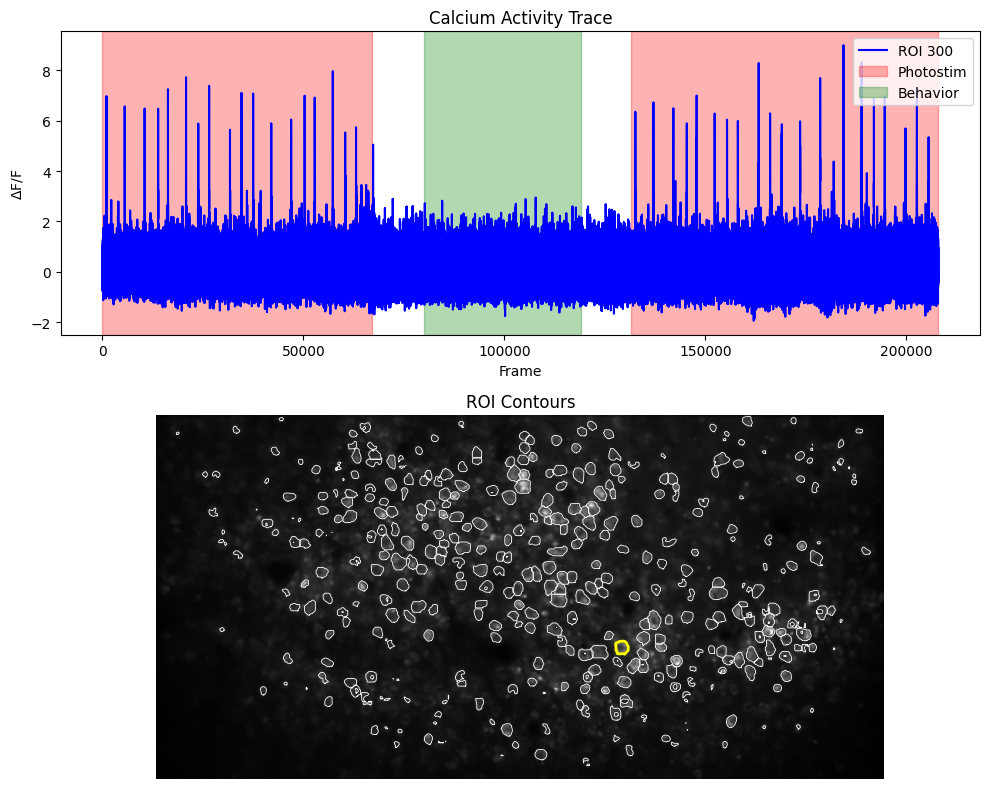

In [85]:
# Parameters 
ROI = 300
image = nwbfile.processing["processed"].data_interfaces["images"].images["average_projection"].data[:]  # shape: (H, W)

# Create figure with two vertically stacked plots 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), height_ratios=[1, 1.2])

# Top: Calcium trace plot
ax1.plot(roi_dff[:, ROI], label=f'ROI {ROI}', color='blue')

# Add shaded regions
ax1.axvspan(photostim_start, photostim_stop, color='red', alpha=0.3, label='Photostim')
ax1.axvspan(behavior_start, behavior_stop, color='green', alpha=0.3, label='Behavior')
ax1.axvspan(photostim_post_start, photostim_post_stop, color='red', alpha=0.3)

ax1.set_ylabel(r'$\Delta$F/F')
ax1.set_xlabel('Frame')
ax1.set_title('Calcium Activity Trace')
ax1.legend(loc='upper right')

# Bottom: Grayscale image with ROI contours 
ax2.imshow(image, cmap='gray')
ax2.set_title('ROI Contours')
ax2.axis('off')

# Overlay ROI contours
for i, mask in enumerate(image_segmentation.image_mask):
    mask_array = np.array(mask)
    contours = measure.find_contours(mask_array, level=0.5)
    for contour in contours:
        color = 'yellow' if i == ROI else 'white'
        linewidth = 2.0 if i == ROI else 0.6
        ax2.plot(contour[:, 1], contour[:, 0], color=color, linewidth=linewidth)

plt.tight_layout()
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Align ROI DFF to events (e.g. photostimulus periods, BCI events

to do - need to figure out correct BCI event, write some code to convert BCI times which are in seconds and relative to start of trial 

In [72]:
def event_aligned_activity(roi_dff, stimulus_frames, pre_frames, post_frames):
    """
    Extract perievent windows around stimulus frames from timeseries data

    Parameters:
    - roi_dff: np.ndarray of shape (n_frames, n_rois)
    - stimulus_frames: list or array of stimulus frame indices
    - pre_frames: number of frames before the stimulus
    - post_frames: number of frames after the stimulus

    Returns:
    - aligned_data: np.ndarray of shape (n_events * n_rois, pre+post)
    - mean_response: np.ndarray of shape (pre+post, 1)
    """
    aligned_data = []

    for frame in stimulus_frames:
        if frame - pre_frames < 0 or frame + post_frames >= roi_dff.shape[0]:
            continue  # Skip events too close to start or end
        for roi in range(roi_dff.shape[1]):
            window = roi_dff[frame - pre_frames : frame + post_frames, roi]
            aligned_data.append(window)

    aligned_data = np.stack(aligned_data, axis=0)
    mean_response = aligned_data.mean(axis=0)
    sem = stats.sem(aligned_data, axis=0) 

    return aligned_data, mean_response


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Plot mean DFF in response to photostimulation

In [16]:
# to do - instead of averaging, maybe just show a single ROI, multiple ROIs, mean, and then relative based on distance.... 
# how to calculate this? 

In [44]:
pre_frames = 30   # Number of frames before the stimulus
post_frames = 30 # Number of frames after the stimulus
stimulus_frames = photostim_table[photostim_table.stim_name == "photostim"].start_frame[0:10] # just get first 50 trials 


aligned_data, mean_response = event_aligned_activity(roi_dff, stimulus_frames, pre_frames, post_frames)


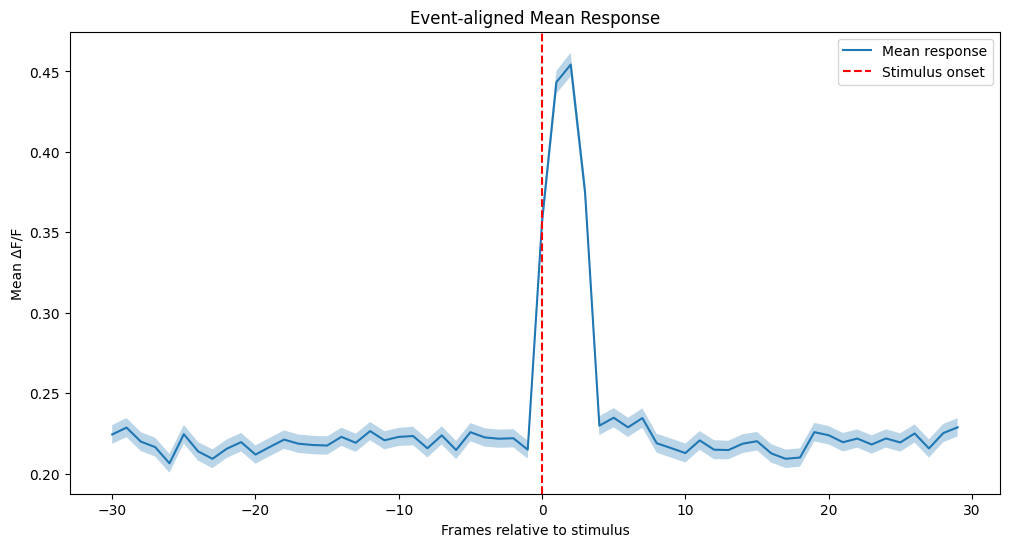

In [37]:
time = np.arange(-pre_frames, post_frames)

sem = stats.sem(aligned_data, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(time, mean_response, label='Mean response')
plt.fill_between(time, mean_response - sem, mean_response + sem, alpha=0.3)
plt.axvline(0, color='red', linestyle='--', label='Stimulus onset')
plt.xlabel('Frames relative to stimulus')
plt.ylabel('Mean ΔF/F')
plt.title('Event-aligned Mean Response')
plt.legend()
plt.show()

to do: 
    load data function x 

    metadata - identify relevant metadata to pull x 
    
    
    plot ROIs with stimulus epochs overlaid - do this programmatically pulling from tables x 
    
    PSTH/event aligned neural activity x 
    
        - opto stim x 
        
        - BCI (q: which event? motor movements?) 
        
    relate ROIs in dff to ROI masks x 
        
    neural activity of each ROI organized by distance from stim neuron, maybe plot individual ROIs in response to each photostim period? and then plot relative to how far it is from stimmulus neuron ... 
    
    nice to have: something to find connected neurons from stim periods, function to compare activity across several days 
    
    questions 